<img src="https://relevance.ai/wp-content/uploads/2021/11/logo.79f303e-1.svg" width="150" alt="Relevance AI" />
<h5> Developer-first vector platform for ML teams </h5>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RelevanceAI/workflows/blob/main/cluster-reporting/👍_Cluster_Reports_With_Relevance_AI.ipynb)

# 🤖: Get started with our open-source cluster report!


This notebook is a quick guide on how to use Relevance AI for cluster reports from cluster models and analyse their metrics!


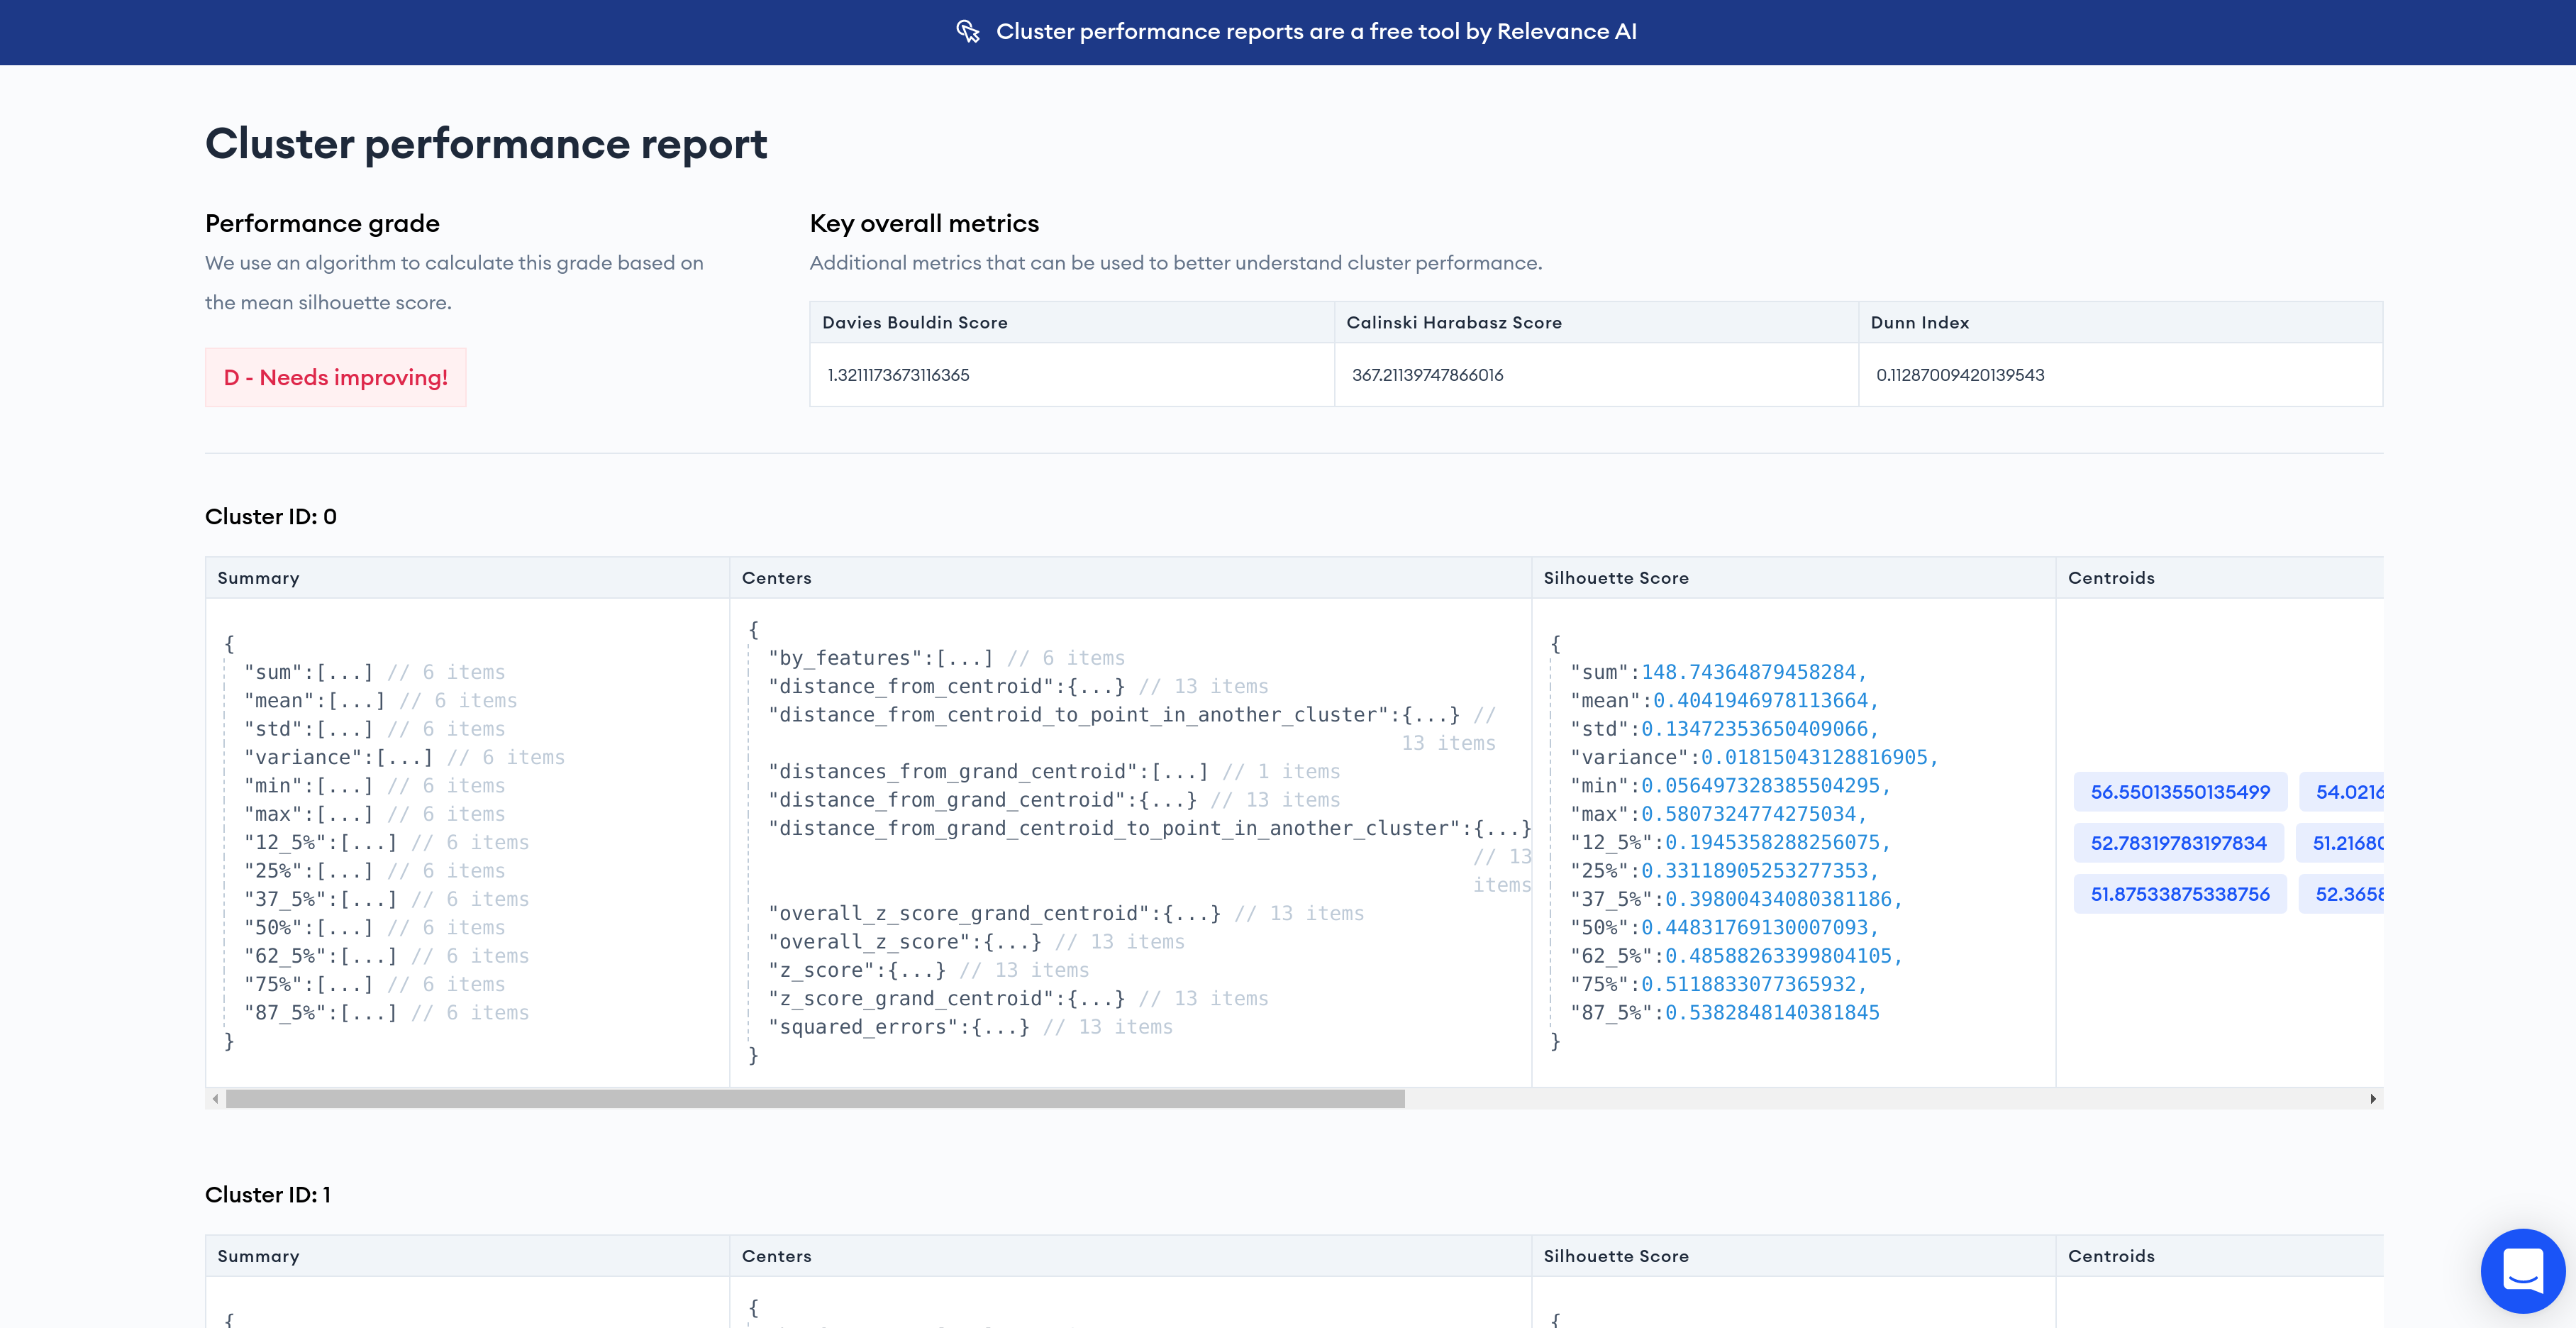

## ⏬ Install `RelevanceAI`

In [ ]:
!pip install -q -U RelevanceAI==2.1.6

## ⚡ Get Data

Load our sample dataset to start!

In [ ]:
import requests
docs = requests.get("https://raw.githubusercontent.com/fanzeyi/pokemon.json/master/pokedex.json").json()
for d in docs:
    b = d['base']
    d.update(b)
    d['base_vector_'] = [b["Attack"], b["Defense"], b["HP"], b["Sp. Attack"], b["Sp. Defense"], b["Speed"]]

In [ ]:
from relevanceai import Client

client = Client()

ds = client.Dataset("pokedex")
ds.upsert_documents(docs, create_id=True)

# 🙉 Now let us run some clustering using Scikit-learn

In [ ]:
import pandas as pd
import numpy as np
from relevanceai import Client

from relevanceai.reports.cluster import ClusterReport

vector_fields = ["base_vector_"]

cluster_ops = ds.cluster(
    model="communitydetection",
    vector_fields=vector_fields
)


💥 Viewing Creating the cluster report

You can see a dictionary output of your report down below! But notice how terrible it looks! 

In [ ]:
# JSON output
report = cluster_ops.report
report.internal_report

# 🍉 Visualizing and storing your cluster reports

In [ ]:
# Storing your cluster report

response = client.store_cluster_report(
    report_name="kmeans",
    report=report.internal_report
)

After this - you should now be able to see your awesome cluster report!

# 🌇 Next Steps

This is just a quick tutorial on Relevance AI, there are many more applications that is possible such as zero-shot based labelling, recommendations, anomaly detection, projector and more:

- Explore our platform at https://cloud.releveance.ai
- There are more indepth tutorials and guides at https://docs.relevance.ai
- There are detailed library references at https://relevanceai.readthedocs.io/
- Join our slack community at https://join.slack.com/t/relevance-ai/shared_invite/zt-11fo8oush-dHPd57wamhoQ7J5arNv1mg

# Documentation Links

- https://relevanceai.readthedocs.io/en/latest/relevanceai.cluster_report.html